<h1>Feature Scaling</h1>

<p>1. Standardization (Z-score Normalization)</p>

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ds = sns.get_dataset_names()
ds

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [98]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [99]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [100]:
df.dropna(inplace=True)

In [102]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [104]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,Male
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,Male
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,Female
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male


In [106]:
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: xlabel='island'>

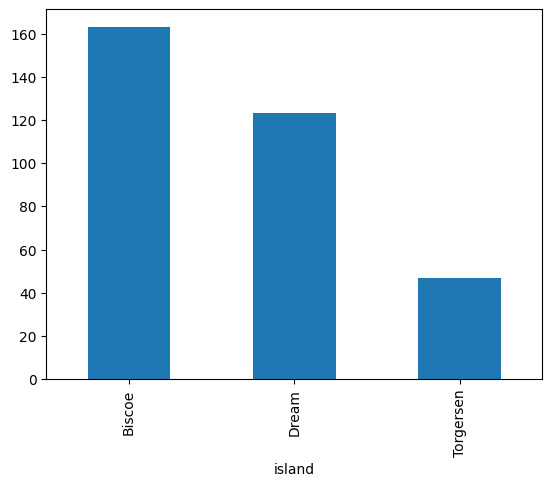

In [115]:
# df[["species","island"]].value_counts().plot(kind="bar")
df["island"].value_counts().plot(kind="bar")

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

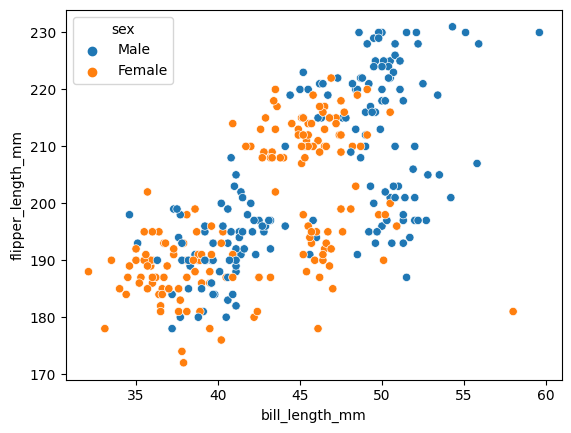

In [117]:
sns.scatterplot(x=df["bill_length_mm"],y=df["flipper_length_mm"],hue=df["sex"])

In [118]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()

In [128]:
scaled_df_standardized = scaler.fit_transform(df[["bill_length_mm","flipper_length_mm"]])

In [130]:
scaled_df_standardized = pd.DataFrame(scaled_df_standardized)
scaled_df_standardized

,0,1
0,-0.896042,-1.426752
1,-0.822788,-1.069474
2,-0.676280,-0.426373
3,-1.335566,-0.569284
4,-0.859415,-0.783651
...,...,...
328,0.587352,0.931283
329,0.514098,1.002739
330,1.173384,1.502928
331,0.221082,0.788372


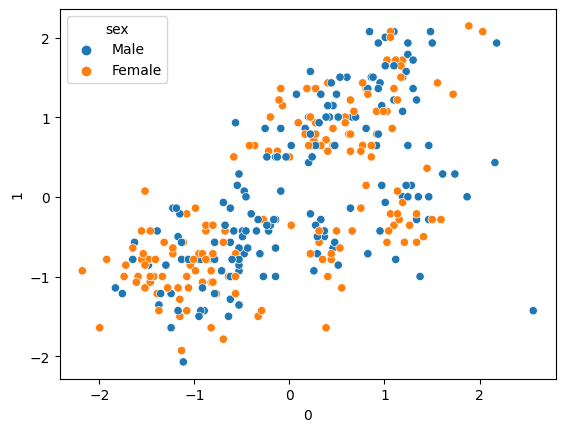

In [136]:
sns.scatterplot(x=scaled_df_standardized[0],y=scaled_df_standardized[1],hue=df["sex"])
df["bill_length_mm"] = scaled_df_standardized[0]
df["flipper_length_mm"] = scaled_df_standardized[1]

In [137]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,-0.529772,19.6,-1.355296,4675.0,Male
35,Adelie,Dream,-1.372193,21.1,-1.355296,4150.0,Male
257,Gentoo,Biscoe,1.191698,17.3,1.502928,5250.0,Male
52,Adelie,Biscoe,-1.372193,17.9,-1.426752,3450.0,Female
107,Adelie,Biscoe,-0.328323,20.0,-0.283462,3900.0,Male


<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

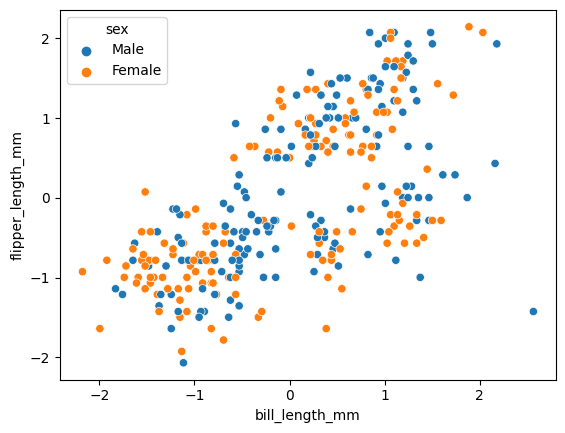

In [138]:
sns.scatterplot(x=df["bill_length_mm"],y=df["flipper_length_mm"],hue=df["sex"])